##  Kaggle - Titanic Survival Challenge

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [70]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')
# Shuffle the data
train_df = train_df.sample(n=len(train_df), random_state=1)


##### Data variables:
- survived (0 = no, 1 = yes)
- pclass (ticket class, 1st, 2nd, 3rd)
- sex (0 = female, 1 = male)
- age
- sibsp (num of siblings/spouses aboard)
- parch (num of parents/children aboard)
- ticket (ticket number)
- fare
- cabin number
- embarked port  (c = cherbourg, q = queenstown, s = southampton)


In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


#### Data processing

In [72]:
train_df.describe()
#train_df.describe(include=['O'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Survival by passenger class


In [73]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Survival by sex


In [74]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Survival by SibSp (siblings, spouses)


In [75]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### Survival by Parch (parents, children)

In [76]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


#### Survival by family size

In [77]:
# Add family size column
train_df['Family_Size'] = train_df['Parch'] + train_df['SibSp'] + 1
test_df['Family_Size'] = test_df['Parch'] + test_df['SibSp'] + 1
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


#### Survival by embarkment

In [78]:
train_df['Embarked_Port'] = train_df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
test_df['Embarked_Port'] = test_df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

train_df.groupby(['Embarked_Port'], as_index=False)['Survived'].mean()


,Embarked_Port,Survived
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.336957


#### Survival by age

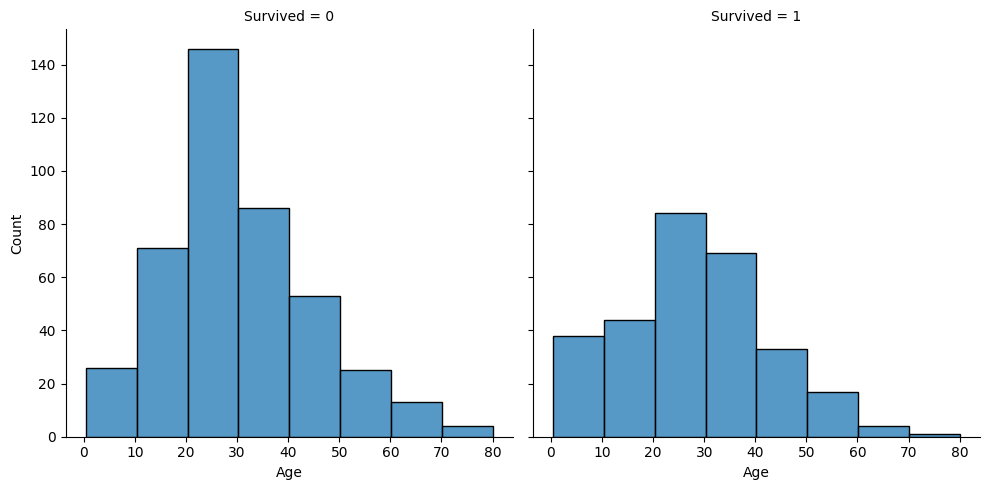

In [79]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [80]:
# Group ages for more clarity
train_df['Age_Group'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Group'] = pd.qcut(test_df['Age'], 8)
train_df.groupby(['Age_Group'], as_index=False)['Survived'].mean()

,Age_Group,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [81]:
# Simplyfing ages
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age']

# Simplyfing ages
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

#### Survival by fare

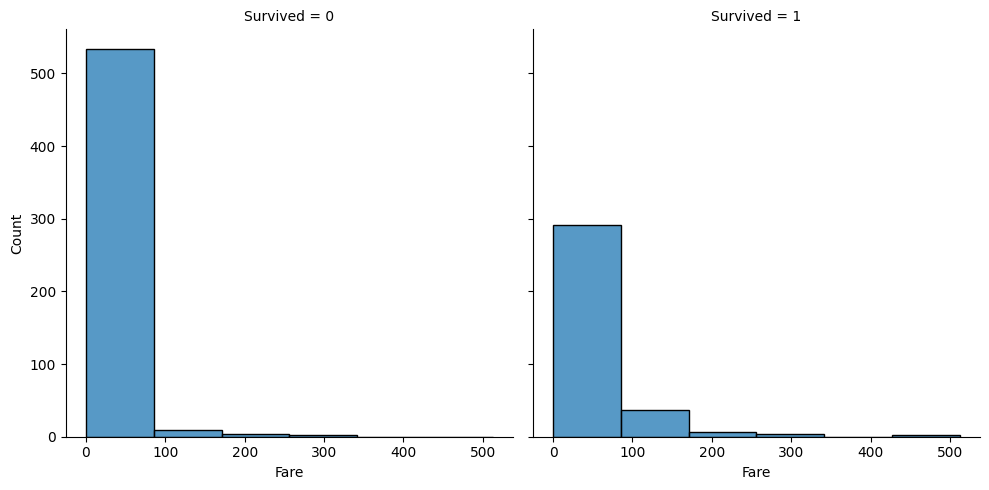

In [82]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [83]:
train_df['Fare'].max()

512.3292

In [84]:
# Group fare for more clarity
train_df['Fare_Group'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Group'] = pd.qcut(test_df['Fare'], 6)

train_df.groupby(['Fare_Group'], as_index=False)['Survived'].mean()

,Fare_Group,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [85]:
# Simplyfing fares
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] = 6

# Simplyfing fares
test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare'] = 6

In [86]:
# String splitting, extracting titles from names
train_df['Name'].str.split(pat= ",", expand=True)[1]  # Split by comma (last, title. first middle)

test_df['Name'].str.split(pat= ",", expand=True)[1]  # Split by comma (last, title. first middle)

0                                Mr. James
1                 Mrs. James (Ellen Needs)
2                       Mr. Thomas Francis
3                               Mr. Albert
4       Mrs. Alexander (Helga E Lindqvist)
                      ...                 
413                              Mr. Woolf
414                          Dona. Fermina
415                    Mr. Simon Sivertsen
416                          Mr. Frederick
417                      Master. Michael J
Name: 1, Length: 418, dtype: object

In [87]:
train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True) # Split by dot to separate title
test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True) # Split by dot to separate title

,0,1
0,Mr,James
1,Mrs,James (Ellen Needs)
2,Mr,Thomas Francis
3,Mr,Albert
4,Mrs,Alexander (Helga E Lindqvist)
...,...,...
413,Mr,Woolf
414,Dona,Fermina
415,Mr,Simon Sivertsen
416,Mr,Frederick


In [88]:
# Add title column
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].str.strip()
# Add title column
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].str.strip()

#### Tickets

In [89]:
train_df['Title'].nunique()

17

In [90]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
the Countess      1
Don               1
Sir               1
Capt              1
Ms                1
Jonkheer          1
Mme               1
Name: count, dtype: int64

Title categories: 
- Military - (Capt, Col, Major)
- Noble - (Jonkheer, the Countess, Don, Lady, Sir, Master)
- Profession - (Dr, Rev)
- Unmarried women - (Mlle, Ms, Miss)
- Married women - (Mrs, Mme)
- Men - (Mr)

In [91]:
# Group the titles
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Master': 'Noble',
    
    # Married vs Unmarried females
    'Mlle':  'Ms',
    'Miss': 'Ms',
    'Mme': 'Mrs',  
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Master': 'Noble',
    
    # Married vs Unmarried females
    'Mlle':  'Ms',
    'Miss': 'Ms',
    'Mme': 'Mrs',  
})


In [92]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Military,5,0.400000
2,Mr,517,0.156673
3,Mrs,126,0.793651
4,Ms,185,0.702703
5,Noble,45,0.577778
6,Rev,6,0.000000


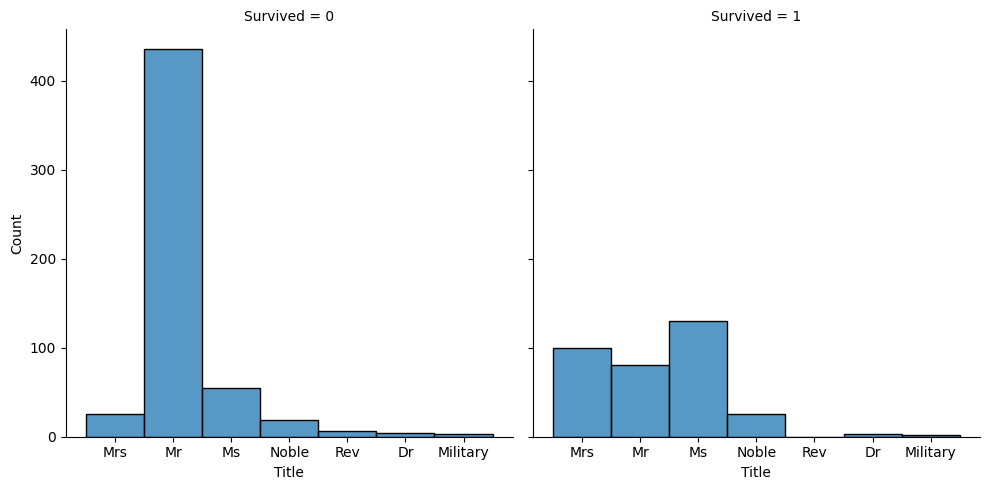

In [93]:
sns.displot(train_df, x='Title', col='Survived', binwidth=10, height=5)

#### Survival by cabin (assigned or unassigned)

In [94]:
train_df['Cabin'] = train_df['Cabin'].fillna(0) # 0 = Unassigned 
train_df['Cabin'] = train_df['Cabin'].mask(train_df['Cabin'] != 0, 1)  # 1 = Assigned

test_df['Cabin'] = test_df['Cabin'].fillna(0) # 0 = Unassigned 
test_df['Cabin'] = test_df['Cabin'].mask(test_df['Cabin'] != 0, 1)  # 1 = Assigned

In [95]:
train_df['Cabin']

862    1
223    0
84     0
680    0
535    0
      ..
715    1
767    0
72     0
235    0
37     0
Name: Cabin, Length: 891, dtype: object

In [96]:
train_df['Cabin'].value_counts()

Cabin
0    687
1    204
Name: count, dtype: int64

In [97]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].mean()

,Cabin,Survived
0,0,0.299854
1,1,0.666667


In [98]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Embarked_Port,Age_Group,Fare_Group,Title
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,7.0,0,0,17466,3.0,1,S,1,Southampton,"(47.0, 80.0]","(14.454, 26.0]",Mrs
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,1.0,0,S,1,Southampton,NaN,"(7.775, 8.662]",Mr
84,85,1,2,"Ilett, Miss. Bertha",female,1.0,0,0,SO/C 14885,2.0,0,S,1,Southampton,"(16.0, 20.125]","(8.662, 14.454]",Ms


In [99]:
train_df.shape

(891, 17)

In [100]:
test_df.shape

(418, 16)

#### NaN values

In [101]:
train_df.columns[train_df.isna().any()]

Index(['Age', 'Embarked', 'Embarked_Port', 'Age_Group'], dtype='object')

In [102]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Embarked_Port', 'Age_Group', 'Fare_Group', 'Title'],
      dtype='object')

In [103]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)


### Binary Encoding

In [104]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [105]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [106]:
ode_cols = ['Family_Size']
ohe_cols = ['Sex', 'Embarked']

In [107]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Group', 'Fare_Group'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

#### Pipelines

In [108]:
# Ordinal Pipeline
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [109]:
# OneHot Pipeline
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

#### Transformer

In [110]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'Cabin', 'Age', 'Fare'])  # Columns to keep
    ],
    remainder='drop',
    n_jobs=-1)

### Models

##### RandomForestClassifier

In [111]:
rfc = RandomForestClassifier()

In [112]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5, 10, 15],
    'max_depth': [8, 9, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [113]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [114]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [115]:
# Best estimators and score (RFC)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.8230867723825469


##### DecisionTreeClassifier

In [116]:
dtc = DecisionTreeClassifier()

In [117]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [118]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [119]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [120]:
# Best estimators and score (DTC)
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.8146360681571949


##### KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier()

In [141]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [142]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [143]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [125]:
# Best estimators and score (KNN)
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.7936471978725499


##### SVC

In [126]:
svc = SVC()

In [127]:
param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

In [128]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [129]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('...
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [130]:
# Best estimators and score (SVC)
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8174529695656456


##### LogisticRegression

In [131]:
lr = LogisticRegression()

In [132]:
param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.001],
}

In [133]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [134]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001]}))])

In [135]:
# Best estimators and score (LR)
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.7964640992810007


##### NaiveBias

In [136]:
gnb = GaussianNB()

In [137]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [138]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [139]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [140]:
# Best estimators and score (GNB)
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7613611740372305


### Predictions

In [150]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)


In [152]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred6
})

In [154]:
submission.to_csv('/Users/jacob/desktop/py/titanic/submission2606_1.csv', index=False)
submission2.to_csv('/Users/jacob/desktop/py/titanic/submission2606_2.csv', index=False)
submission3.to_csv('/Users/jacob/desktop/py/titanic/submission2606_3.csv', index=False)
submission4.to_csv('/Users/jacob/desktop/py/titanic/submission2606_4.csv', index=False)
submission5.to_csv('/Users/jacob/desktop/py/titanic/submission2606_5.csv', index=False)
submission6.to_csv('/Users/jacob/desktop/py/titanic/submission2606_6.csv', index=False)